# GRUPO 8


Integrantes:
  
1.   Mateo Gravi Fiorino
2.   Tomas Navarro Miñón
3.   Valentino Gagliardi
4.   Lucas Gauto

# PREGUNTAS A RESOLVER:

Elegimos ***París*** y nos realizamos las siguientes preguntas:

*   ¿Cuáles son los 5 barrios mas comentados?
*   ¿Cuántas personas tienen 1 , 2, 3, 4 propiedades ?
*   ¿Cuál es la zona que en promedio es la más cara de la ciudad? ¿Y  la mas barata?
*   En el barrio más caro de la ciudad, ¿Cuál es el promedio de precio de Hoteles, Casas/Departamentos y Habitaciones Privadas?

A partir de estas preguntas, vamos a utilizar una parte de todos los datos.




# ESTRUCTURA DE DATOS A UTILIZAR


La estructura de datos que elegimos para contestar estas preguntas es una lista de diccionarios, la cual sería asi:

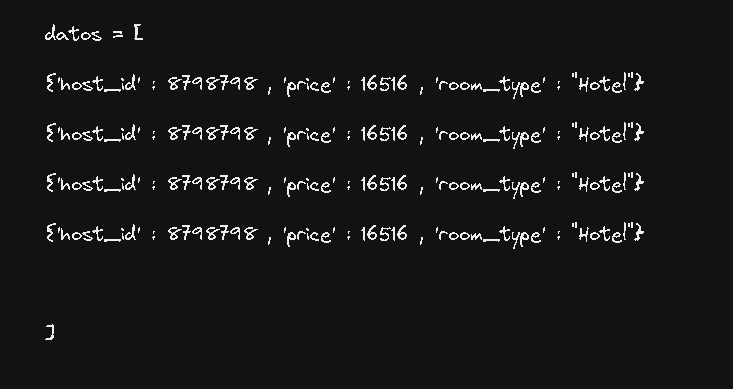

 # Carga de Datos


In [ ]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def cargaDeDatos(name):
    datos = []
    with open(name, encoding="utf-8") as File:
        archivo = csv.reader(File)
        for indice, fila in enumerate(archivo):
            if indice == 0:
                titulos = fila
            else:
                diccionario = {}
                for columna, valor in zip(titulos, fila):
                    if columna == "host_id" or columna == "price" or columna == "neighbourhood" or columna == "number_of_reviews" or columna == "room_type" or columna == "calculated_host_listings_count":
                        diccionario[columna] = valor
                datos.append(diccionario)
    
    return datos

cargaDeDatos('listings.csv')

[{'calculated_host_listings_count': '1',
  'host_id': '2987420',
  'neighbourhood': 'Popincourt',
  'number_of_reviews': '3',
  'price': '90',
  'room_type': 'Entire home/apt'},
 {'calculated_host_listings_count': '1',
  'host_id': '15919106',
  'neighbourhood': 'Luxembourg',
  'number_of_reviews': '144',
  'price': '190',
  'room_type': 'Entire home/apt'},
 {'calculated_host_listings_count': '1',
  'host_id': '5329959',
  'neighbourhood': 'Bourse',
  'number_of_reviews': '42',
  'price': '250',
  'room_type': 'Entire home/apt'},
 {'calculated_host_listings_count': '1',
  'host_id': '4949756',
  'neighbourhood': 'Reuilly',
  'number_of_reviews': '0',
  'price': '90',
  'room_type': 'Entire home/apt'},
 {'calculated_host_listings_count': '1',
  'host_id': '16621346',
  'neighbourhood': 'Buttes-Chaumont',
  'number_of_reviews': '12',
  'price': '250',
  'room_type': 'Entire home/apt'},
 {'calculated_host_listings_count': '1',
  'host_id': '7645036',
  'neighbourhood': 'Entrepôt',
  'numb

# Pregunta 1


Para la primera pregunta: ¿Cuáles son los 5 barrios mas comentados?



In [ ]:
#primera pregunta
datos = cargaDeDatos('listings.csv')

def cuenta_resenias(lista, neighbourhood_keys, num_reviews_keys):
    
    res_barrio = {}
    for diccionario in lista:
        for keys, values in diccionario.items():
            if keys == neighbourhood_keys:
                contador = diccionario[num_reviews_keys]
                if values in res_barrio:
                    res_barrio[values] += int(contador)
                else:
                    res_barrio[values] = int(contador)

    return res_barrio


def ordenar_comentarios(diccionario):
    list_ordenar_come = []
    for barrios, comentarios in diccionario.items():
        list_ordenar_come.append([barrios, comentarios])
        list_ordenar_come.sort(reverse=True, key=lambda x: x[1])
    print(
       f"\nLos 5 barrios mas comentados son: \n 1. {list_ordenar_come[0]} \n 2. {list_ordenar_come[1]} \n 3. {list_ordenar_come[2]} \n 4. {list_ordenar_come[3]} \n 5. {list_ordenar_come[4]}")
    return list_ordenar_come

res_x_barrio = cuenta_resenias(datos, "neighbourhood", "number_of_reviews")
mi_lista = ordenar_comentarios(res_x_barrio)


Los 5 barrios mas comentados son: 
 1. ['Buttes-Montmartre', 102601] 
 2. ['Popincourt', 100240] 
 3. ['Entrepôt', 88069] 
 4. ['Vaugirard', 85216] 
 5. ['Temple', 72951]


En la primer funcion cuenta_resenias(), utilizamos 3 parametros.

Lo primero que hacemos es guardar en un diccionario, los datos que vamos a necesitar:



1.  Como key, vamos a utilizar el nombre del barrio
2.  Como value vamos a contar cuantas reseñas tiene ese barrio.



Para la segunda funcion ordenar_comentarios():
Se nos ocurrio ordenarlos dentro de una lista, ya que de esta forma podemos hacer un sort() y obtener de mayor a menor los barrios mas comentados.


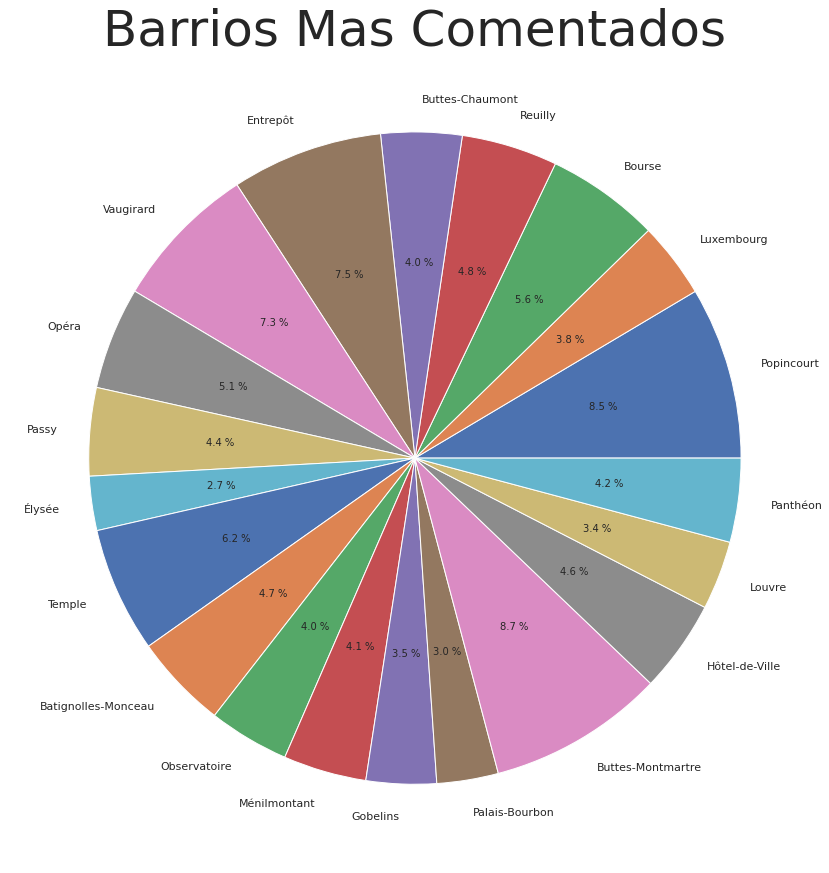

In [ ]:
def dibujar_grafico_torta(titulo, etiquetas, porcentajes):
    plt.figure(figsize=(50, 15))
    plt.title(titulo, fontsize=50)  # titulo del gráfico y tamaño de la fuente
    # autopct="%0.1f %%" hace que aparezcan los porcentajes dentro de cada parte de la torta
    plt.pie(porcentajes, labels=etiquetas, autopct="%0.1f %%" )
  # podemos setear todo lo que querramos como antes, tamaños de fuentes, título, etc.

dibujar_grafico_torta("Barrios Mas Comentados", res_x_barrio.keys(), res_x_barrio.values())


# Pregunta 2

La segunda pregunta corresponde a: 

¿Cuántas personas tienen 1,2,3 o 4 ?

Para esta pregunta decidimos usar estas tres funciones,
La primera cant_prop() o cantidad de propiedades por usuario,
recorre los datos para guardarlos en un diccionario donde la key es el host_ID, es decir un numero de host unico, y como value guarda la columna calculated_host_listings la cual refiere a la cantidad de propiedades de ese usuario.

En la segunda funcion, cuant_pers_prop(), o cuantas personas tienen x propiedades. Lo que hacemos es un contador inicializado en 0 y con el bucle for recorremos el diccionario que le pasamos por parametro, en este caso, datos, y con el contador vemos segun los parametros establecidos, cuantas personas tienen X propiedades, por ejemplo en la primer vuelta vemos cuantas personas tienen una sola propiedad y asi hasta llegar a 4.

En la ultima funcion, repetidor(), lo que hacemos es repetir la funcion de arriba 10 veces. De esta forma acortamos codigo reutilizando solo una funcion.


In [ ]:
def cant_prop(lista, host_id_key, calc_host_listings_key):
    can_prop_dic = {}
    for diccionario in lista:
        for keys, values in diccionario.items():
            if keys == host_id_key:
                can_prop_dic[values] = diccionario[calc_host_listings_key]

    return can_prop_dic


def cuant_pers_prop(diccionario, numero):
    contador = 0
    for propiedades in diccionario.values():
        if int(propiedades) == numero:
            contador += 1
    return contador

def repetidor():
    contador = 1
    cantidad_de_prop_xpersona = {}
    for i in range(1,5):
        propiedad = cuant_pers_prop(dicc, contador)
        cantidad_de_prop_xpersona["propiedades"+" "+str(contador)] = propiedad
        contador += 1
    print(cantidad_de_prop_xpersona)
    return cantidad_de_prop_xpersona

dicc = cant_prop(datos, "host_id", "calculated_host_listings_count")
cantidad_de_prop_xpersona = repetidor()

{'propiedades 1': 36640, 'propiedades 2': 2002, 'propiedades 3': 423, 'propiedades 4': 218}


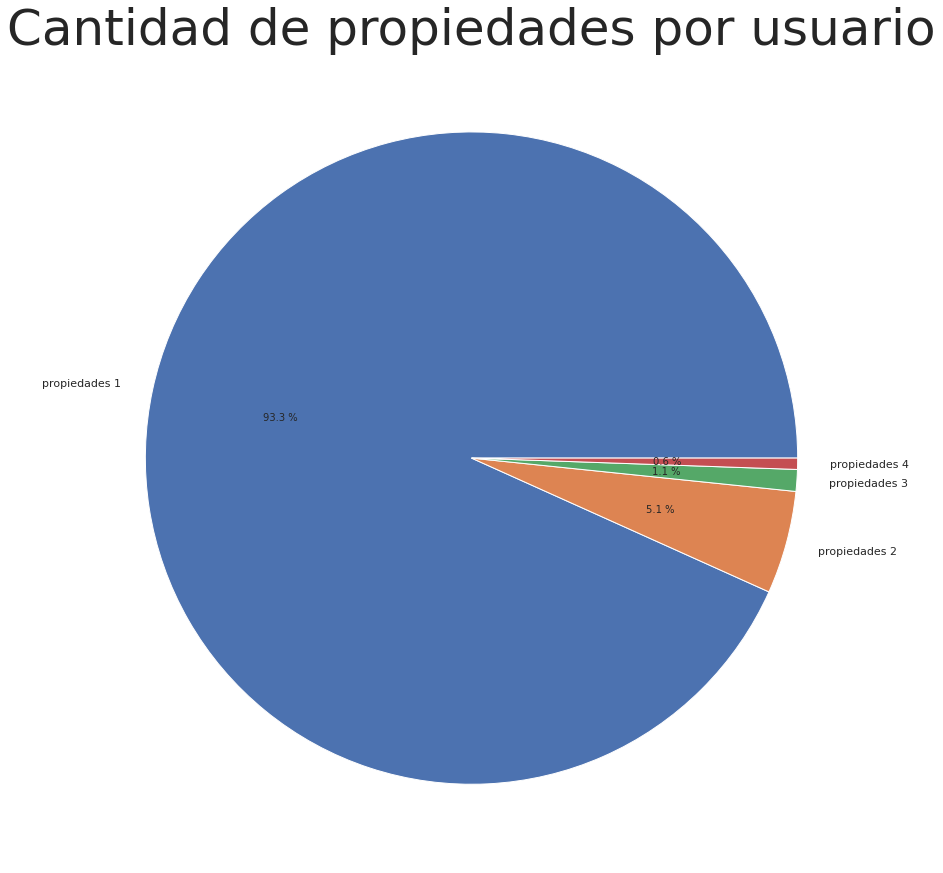

In [ ]:
dibujar_grafico_torta("Cantidad de propiedades por usuario", cantidad_de_prop_xpersona.keys(), cantidad_de_prop_xpersona.values())

# Pregunta 3


Para la tercera pregunta, ¿Cuál es la zona que en promedio es la más cara de la ciudad? ¿Y  la mas barata?

Decidimos usar la siguiente funcion, precios().
La cual recibe tres parametros, el primero son los datos a recorrer, el segundo corresponde a key neighbourhood y el tercero a la key de precios.

Declaramos en la primera funcion precios la estructura que vamos a utilizar: un diccionario.

Y con el bucle for recorremos estos datos con el par Clave , Valor.

Declaramos la variable precio y le asignamos el valor del diccionario en la key precio.
Luego comprobamos que la key sea igual a la key de barrio, y si esto pasa, creamos una lista vacia y luego comprobamos si el valor ya esta guardado en el diccionario, si lo esta, hacemos un .append(del valor del precio).

Si no esta en el diccionarios lo guardamos en la lista vacia y luego lo apendeamos.

con la funcion crear_diccionario, nos parecio que la mejor forma de graficar esta pregunta es a traves de la estructura clave:valor. Para eso creamos la funcion crear_diccionario q nos retorna un diccionario y con este, vamos a graficar. 
Con el bucle for recorremos y el mismo nos crea un diccionario que luego graficaremos

Con el bucle for que sigue en la funcion recorremos nuevamente clave valor en los items del diccionario de precios, y hacemos un .apend() a lista que creamos al principio con el promedio ya realizado.

luego, como queremos que nos devuelva una lista ordenada para ver cual es el mas barrio en promedio mas caro, usamos la funcion crearlista, la misma nos retorna una lista de listas ordenadas. Este retorno lo utilizaremos mas tarde para la pregunta 4.

In [ ]:

def precios(lista, neighbourhood_key, price_key):
    dic_precio = {}

    for dic in lista:
        for key, values in dic.items():
            precio = dic[price_key]
            if key == neighbourhood_key:
                lista = []

                if values in dic_precio:
                    dic_precio[values].append(int(precio))
                else:
                    dic_precio[values] = lista
                    dic_precio[values].append(int(precio))
   
    return dic_precio

def crear_diccionario(diccionario):
  diccimprimir={}
  for k, v in diccionario.items():
    diccimprimir[(round(sum(v) / len(v), 2))]= k
  
  return diccimprimir  

def crearlista(diccionario):
  promedios=[]
  for k, v in diccionario.items():
    promedios.append([round(sum(v) / len(v), 2), k])
    promedios.sort(reverse=True, key=lambda x: x[0])
  print(promedios)
  return promedios

dic_precio = precios(datos, "neighbourhood", 'price')
dic_imprimir=crear_diccionario(dic_precio)
promedios=crearlista(dic_precio)




[[263.65, 'Élysée'], [215.96, 'Bourse'], [204.83, 'Louvre'], [196.87, 'Luxembourg'], [194.54, 'Palais-Bourbon'], [189.98, 'Passy'], [184.33, 'Temple'], [178.74, 'Hôtel-de-Ville'], [159.92, 'Opéra'], [155.72, 'Panthéon'], [125.98, 'Entrepôt'], [122.48, 'Vaugirard'], [120.86, 'Batignolles-Monceau'], [118.78, 'Observatoire'], [109.19, 'Popincourt'], [96.47, 'Buttes-Montmartre'], [95.0, 'Reuilly'], [90.46, 'Gobelins'], [87.42, 'Buttes-Chaumont'], [83.2, 'Ménilmontant']]


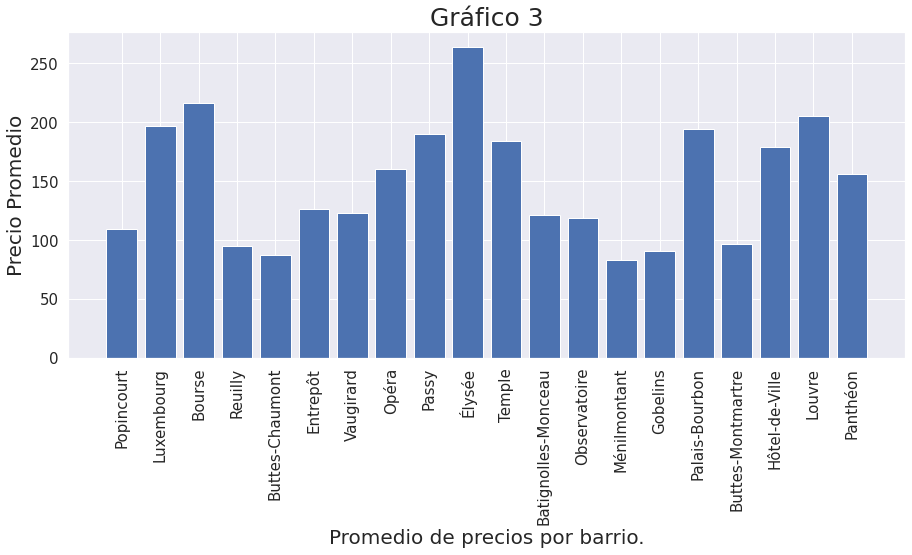

In [ ]:

def dibujar_grafico_barra(titulo, etiqueta_x, etiqueta_y, datos_x, datos_y):
    # para dar las dimensiones de la figura (ojo que debe ir arriba)
    plt.figure(figsize=(15, 6))
    # rota las etiquetas del eje x y tamaño de la fuente de los valores del eje x
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)  # tamaño de la fuente de los valores del eje y
    plt.xlabel(etiqueta_x, fontsize=20)  # indica qué representa el eje x
    plt.ylabel(etiqueta_y, fontsize=20)  # indica qué representa el eje y
    plt.title(titulo, fontsize=25)  # titulo del gráfico y tamaño de la fuente
    plt.bar(datos_x, datos_y)  # pasamos los datos a graficar


dibujar_grafico_barra("Gráfico 3", "Promedio de precios por barrio.",
                      "Precio Promedio", dic_imprimir.values(), dic_imprimir.keys())

# Pregunta 4



Para la cuarta pregunta, En el barrio más caro de la ciudad, ¿Cuál es el promedio de precio de Hoteles, Casas/Departamentos, Habitaciones compartidas y Habitaciones Privadas?


Fue la que mas tiempo nos llevo y pudimos resolverlo de la siguiente forma.

Creamos la funcion promedio_tipo_hab() que recibe 4 parametros. El primero refiere a los datos a usar. Y desde el segundo al cuarto, las keys utilizadas.

primero llamamos a la funcion anterior para poder saber cual es el barrio mas caro y esto lo guardamos en la variable barrio_caro

Despues declaramos las dos estructuras a utilizar, una lista vacia y un diccionario.

Con el bucle for recorremos los datos, y primero a barrio le asignamos el valor correspondiente.
Luego comprobamos si barrio_caro no es igual a neighbourhood le decimos continue, en caso de que sea el barrio_caro asignamos a room y a price el valor correspondiente.

Luego comprobamos si el room_type no fue añadido al diccionario, en esta caso lo agregamos como key y su value es una lista vacia.

Luego apendeamos los precios al valor de room_type correspondiente.

Por ultimo ordenamos las listas como veniamos haciendo anteriormente y la ordenamos.

In [ ]:
def promedio_tipo_hab(lista, room_type_key, price_key, neighbourhood_key):
    promedios_precio = crearlista(dic_precio)
    barrio_caro = promedios_precio[0][1]

    room_types_dic = {}
    room_type_price_avg = {}
    for alquiler in lista:

        neighbourhood = alquiler[neighbourhood_key]
        if barrio_caro != neighbourhood:
            continue

        room_type = alquiler[room_type_key]
        price = alquiler[price_key]

        if room_type not in room_types_dic:
            room_types_dic[room_type] = []

        room_types_dic[room_type].append(int(price))

    for key, value in room_types_dic.items():
        avg = round(sum(value)/len(value), 2)
        room_type_price_avg[avg] = key
    
    print(room_type_price_avg)
    return room_type_price_avg


room_type_price_avg = promedio_tipo_hab(datos, "room_type", "price", "neighbourhood")


[[263.65, 'Élysée'], [215.96, 'Bourse'], [204.83, 'Louvre'], [196.87, 'Luxembourg'], [194.54, 'Palais-Bourbon'], [189.98, 'Passy'], [184.33, 'Temple'], [178.74, 'Hôtel-de-Ville'], [159.92, 'Opéra'], [155.72, 'Panthéon'], [125.98, 'Entrepôt'], [122.48, 'Vaugirard'], [120.86, 'Batignolles-Monceau'], [118.78, 'Observatoire'], [109.19, 'Popincourt'], [96.47, 'Buttes-Montmartre'], [95.0, 'Reuilly'], [90.46, 'Gobelins'], [87.42, 'Buttes-Chaumont'], [83.2, 'Ménilmontant']]
{256.75: 'Entire home/apt', 268.79: 'Private room', 49.14: 'Shared room', 323.94: 'Hotel room'}


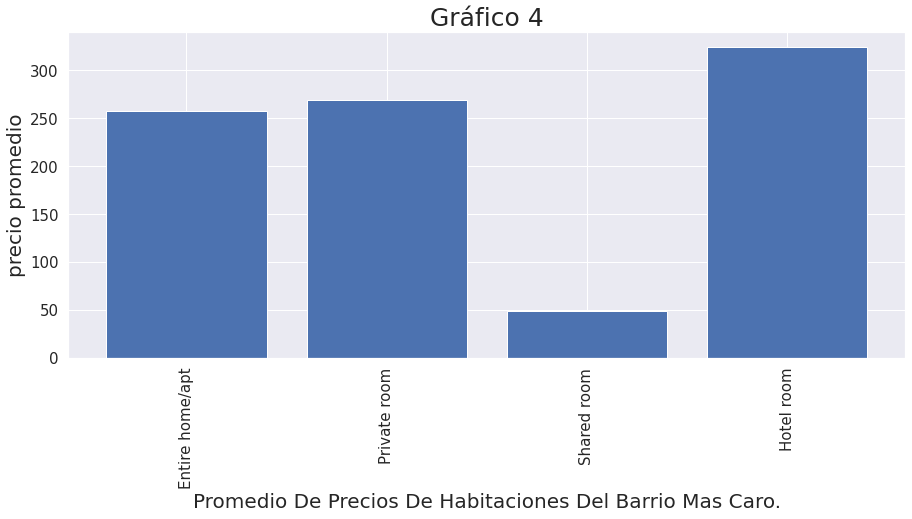

In [ ]:
dibujar_grafico_barra("Gráfico 4", "Promedio De Precios De Habitaciones Del Barrio Mas Caro.",
                      "precio promedio", room_type_price_avg.values(), room_type_price_avg.keys())